In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammaln
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import psi

In [102]:
# Load the sample data
x = np.loadtxt("mle_sample.txt")
n = len(x)
sum_x = np.sum(x)
sum_logx = np.sum(np.log(x))

### Part a

#### Derive function please see attached paper calculation.

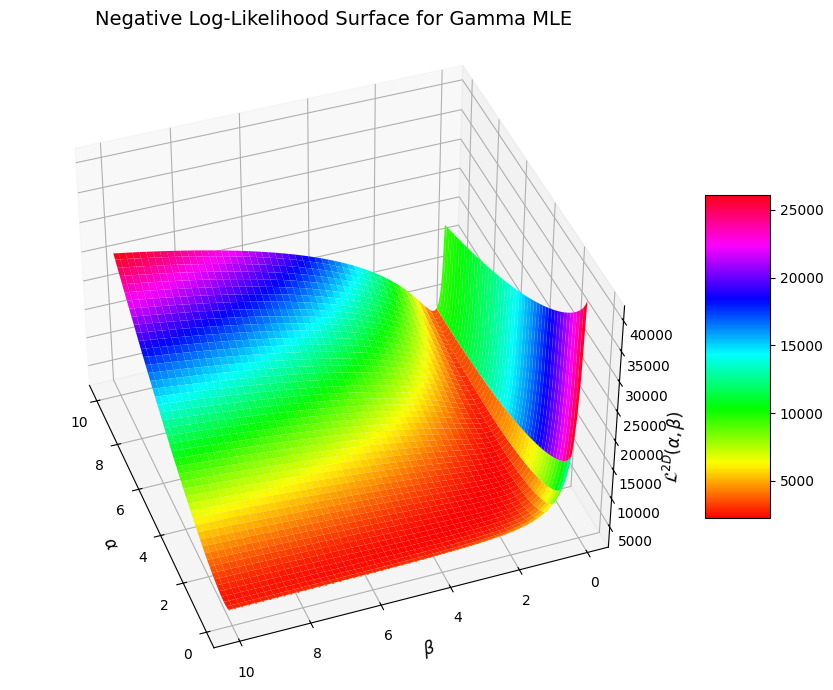

In [103]:
# Define the negative log-likelihood loss function
def loss_2d(alpha, beta):
    return n * gammaln(alpha) + alpha * n * np.log(beta) + (1 / beta) * sum_x - (alpha - 1) * sum_logx

# Create a grid of (alpha, beta) values
alpha_vals = np.linspace(0.1, 10, 200)
beta_vals = np.linspace(0.1, 10, 200)
A, B = np.meshgrid(alpha_vals, beta_vals)
Z = loss_2d(A, B)  # Evaluate loss on the grid

# Plot the 3D surface: X = alpha, Y = beta, Z = loss
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Note: alpha is x-axis, beta is y-axis
surf = ax.plot_surface(A, B, Z, cmap='hsv', edgecolor='none')

# Set labels and title
ax.set_xlabel(r'$\alpha$', fontsize=12)
ax.set_ylabel(r'$\beta$', fontsize=12)
ax.set_zlabel(r'$\mathcal{L}^{2D}(\alpha, \beta)$', fontsize=12)
ax.set_title('Negative Log-Likelihood Surface for Gamma MLE', fontsize=14)
ax.view_init(elev=40, azim=160)

# Adjust layout and show the plot
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.savefig("Q7_a.png")
plt.show()

### Part b: see attached paper calculation

### Part c

In [104]:
def grad_2d(alpha, beta):
    """Gradient of loss_2d with respect to alpha and beta."""
    d_alpha = n * psi(alpha) + n * np.log(beta) - sum_logx
    d_beta = (alpha * n / beta) - (sum_x / beta**2)
    return np.array([d_alpha, d_beta])

In [105]:
def gradient_descent_2d(alpha0, beta0, eta=1e-4, tol=1e-6, max_iter=10000):
    """Perform gradient descent on 2D Gamma MLE loss function with gradient norm check."""
    alpha, beta = alpha0, beta0
    path = [(alpha, beta)]
    prev_loss = loss_2d(alpha, beta)

    for _ in range(max_iter):
        grad = grad_2d(alpha, beta)
        grad_norm = np.linalg.norm(grad)

        # Update parameters
        alpha -= eta * grad[0]
        beta  -= eta * grad[1]

        # Keep parameters positive
        alpha = np.clip(alpha, 1e-6, None)
        beta  = np.clip(beta, 1e-6, None)

        current_loss = loss_2d(alpha, beta)
        path.append((alpha, beta))

        # Convergence criterion: either loss difference or gradient norm is small
        if abs(current_loss - prev_loss) < tol:
            break

        prev_loss = current_loss

    return alpha, beta, len(path), np.array(path)


In [106]:
# Initial starting points
inits = [
    (10.0, 10.0),
    (0.4, 9.642),
    (7.917, 0.487)
]

results = []

for i, (a0, b0) in enumerate(inits, 1):
    a_star, b_star, steps, path = gradient_descent_2d(a0, b0)
    results.append((a_star, b_star, steps, path))
    print(f"Init {i}: Start=({a0:.3f}, {b0:.3f}) → Final=({a_star:.4f}, {b_star:.4f}) in {steps} steps")

Init 1: Start=(10.000, 10.000) → Final=(2.0618, 1.8708) in 2167 steps
Init 2: Start=(0.400, 9.642) → Final=(2.0618, 1.8708) in 2561 steps
Init 3: Start=(7.917, 0.487) → Final=(2.0637, 1.8688) in 1253 steps


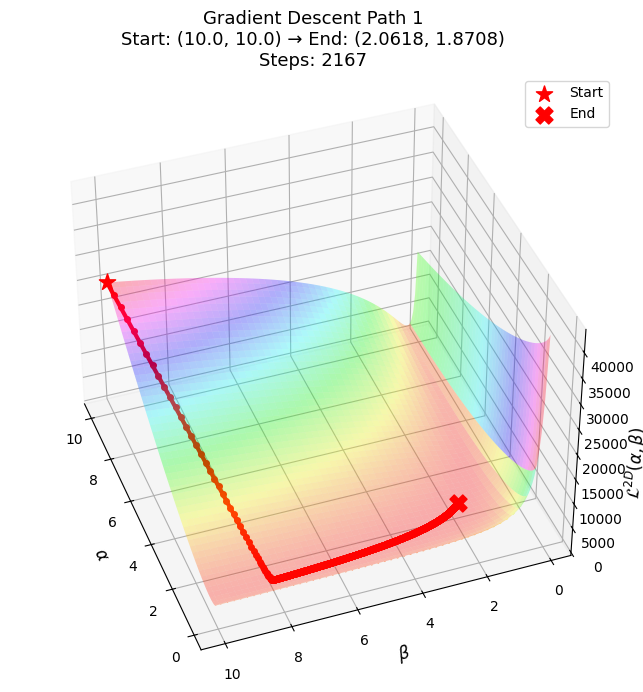

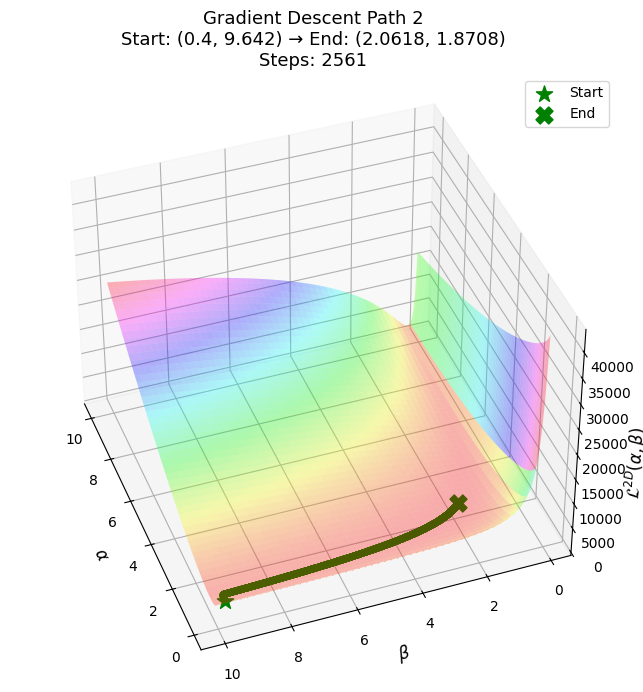

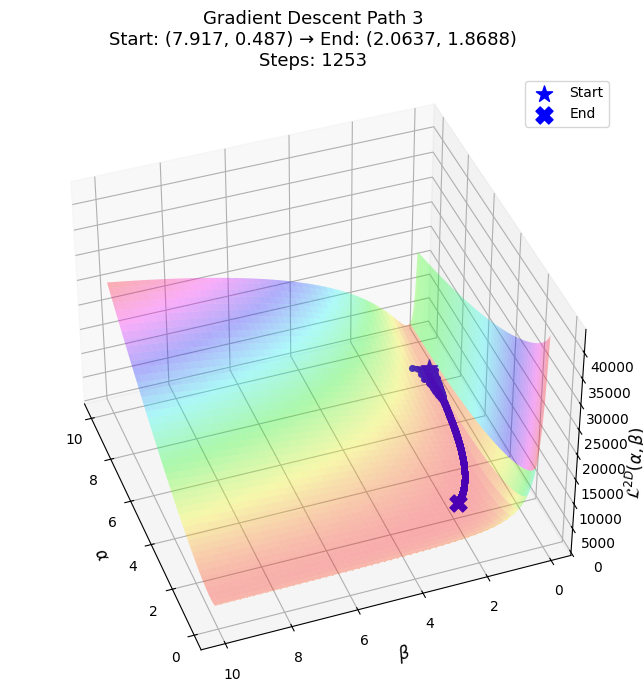

In [109]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']

for i, (a_star, b_star, steps, path) in enumerate(results, 1):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot surface
    surf = ax.plot_surface(A, B, Z, cmap='hsv', alpha=0.3, edgecolor='none')
    
    # Choose color safely
    color = colors[(i-1) % len(colors)]

    # Plot path
    ax.plot(path[:, 0], path[:, 1], [loss_2d(a, b) for a, b in path],
            color=color, linewidth=3, marker='o', markersize=4)

    # Start and end
    ax.scatter(path[0,0], path[0,1], loss_2d(*path[0]), 
               color=color, s=150, marker='*', label='Start')
    ax.scatter(path[-1,0], path[-1,1], loss_2d(*path[-1]),
               color=color, s=150, marker='X', label='End')

    ax.set_xlabel(r'$\alpha$', fontsize=12)
    ax.set_ylabel(r'$\beta$', fontsize=12)
    ax.set_zlabel(r'$\mathcal{L}^{2D}(\alpha, \beta)$', fontsize=12)
    ax.set_title(f'Gradient Descent Path {i}\n'
                 f'Start: ({inits[i-1][0]}, {inits[i-1][1]}) → '
                 f'End: ({a_star:.4f}, {b_star:.4f})\n'
                 f'Steps: {steps}', fontsize=13)
    
    ax.view_init(elev=40, azim=160)
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(f"Q7_c_path_{i}.png")
    plt.show()

### Part d: see attached paper calculation

### Part e

### See attached paper calculation

In [110]:
def loss_1d(alpha, x):
    n = len(x)
    mean_x = np.mean(x)
    sum_logx = np.sum(np.log(x))

    return (
        n * gammaln(alpha)
        + alpha * n * (np.log(mean_x) - np.log(alpha) + 1)
        - (alpha - 1) * sum_logx
    )

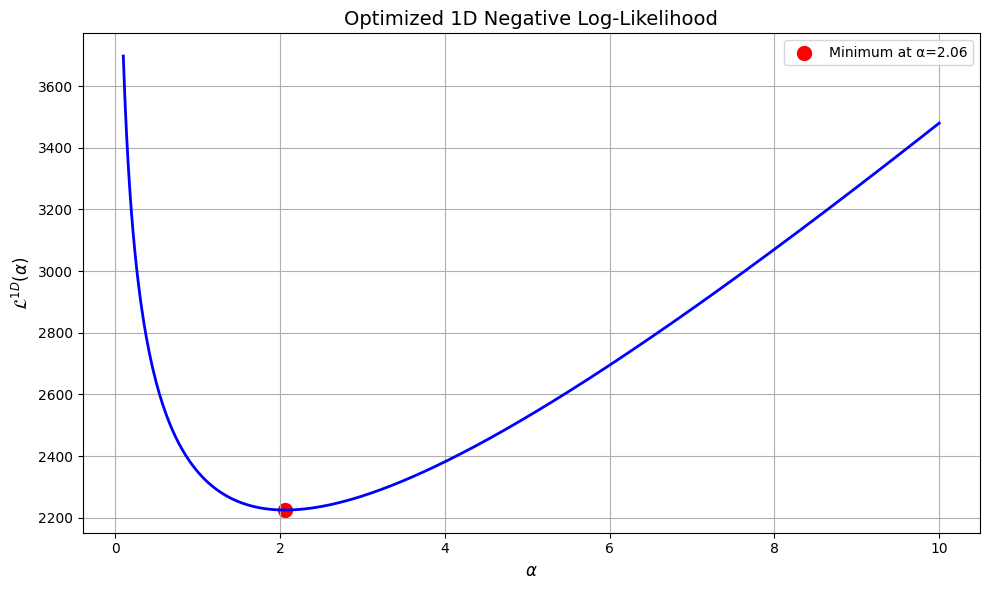

In [111]:
alpha_grid = np.linspace(0.1, 10, 500)
loss_values = [loss_1d(a, x) for a in alpha_grid]

plt.figure(figsize=(10, 6))
plt.plot(alpha_grid, loss_values, 'b-', linewidth=2)
plt.xlabel(r'$\alpha$', fontsize=12)
plt.ylabel(r'$\mathcal{L}^{1D}(\alpha)$', fontsize=12)
plt.title('Optimized 1D Negative Log-Likelihood', fontsize=14)

# Mark the minimum
min_idx = np.argmin(loss_values)
plt.scatter(alpha_grid[min_idx], loss_values[min_idx], c='r', s=100, 
            label=f'Minimum at α={alpha_grid[min_idx]:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Q7_e.png", dpi=300)
plt.show()

### Part f

In [112]:
def grad_loss_1d(alpha, x):
    n = len(x)
    mean_x = np.mean(x)
    sum_logx = np.sum(np.log(x))

    return n * psi(alpha) + n * (np.log(mean_x) - np.log(alpha)) - sum_logx

In [113]:
def gradient_descent_1d(alpha0, x, eta=1e-4, tol=1e-6, max_iter=10000):
    
    alpha = alpha0
    path = [alpha]
    prev_loss = loss_1d(alpha, x)

    for _ in range(max_iter):
        grad = grad_loss_1d(alpha, x)

        # Update step
        alpha -= eta * grad
        alpha = max(alpha, 1e-6)  # Ensure alpha stays positive

        # Evaluate new loss
        current_loss = loss_1d(alpha, x)
        path.append(alpha)

        # Convergence check: gradient near zero OR loss not changing
        if abs(current_loss - prev_loss) < tol or abs(grad) < tol:
            break

        prev_loss = current_loss

    return alpha, len(path), np.array(path)

In [114]:
initial_alphas = [0.4, 7.917]
results_1d = []

for i, a0 in enumerate(initial_alphas, 1):
    a_star, steps, path = gradient_descent_1d(a0, x)
    results_1d.append((a_star, steps, path))
    print(f"Init {i}: Start α={a0:.4f} → Final α={a_star:.4f} in {steps} steps")

Init 1: Start α=0.4000 → Final α=2.0620 in 504 steps
Init 2: Start α=7.9170 → Final α=2.0635 in 883 steps


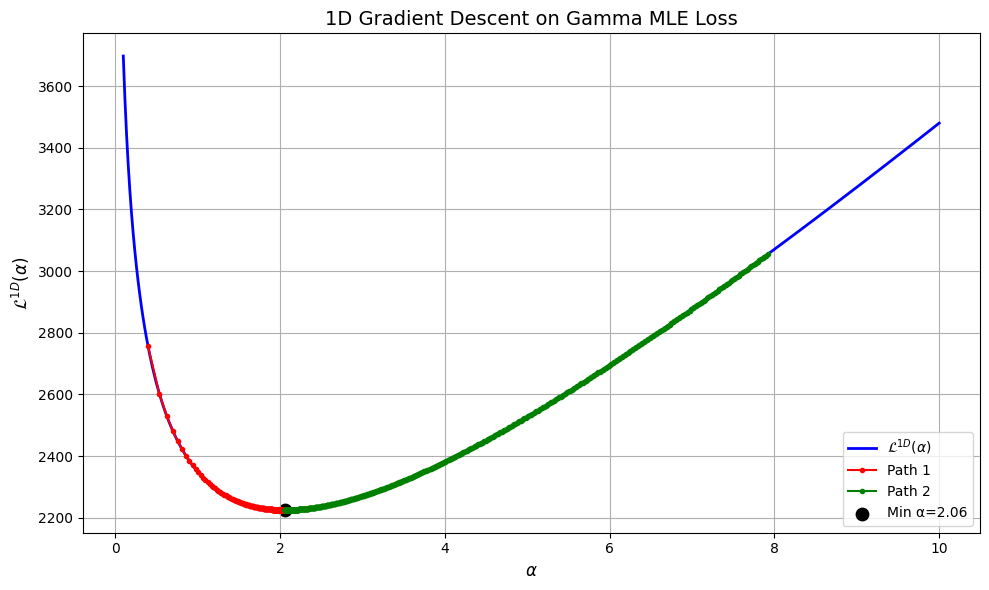

In [115]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_grid, loss_values, 'b-', label=r'$\mathcal{L}^{1D}(\alpha)$', linewidth=2)

# Overlay descent paths
colors = ['r', 'g']
for i, (_, _, path) in enumerate(results_1d):
    losses = [loss_1d(a, x) for a in path]
    plt.plot(path, losses, 'o-', label=f'Path {i+1}', color=colors[i], markersize=3)

# Annotate minimum
plt.scatter(alpha_grid[min_idx], loss_values[min_idx], c='black', s=80, label=f'Min α={alpha_grid[min_idx]:.2f}')

plt.xlabel(r'$\alpha$', fontsize=12)
plt.ylabel(r'$\mathcal{L}^{1D}(\alpha)$', fontsize=12)
plt.title('1D Gradient Descent on Gamma MLE Loss', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Q7_f.png", dpi=300)
plt.show()

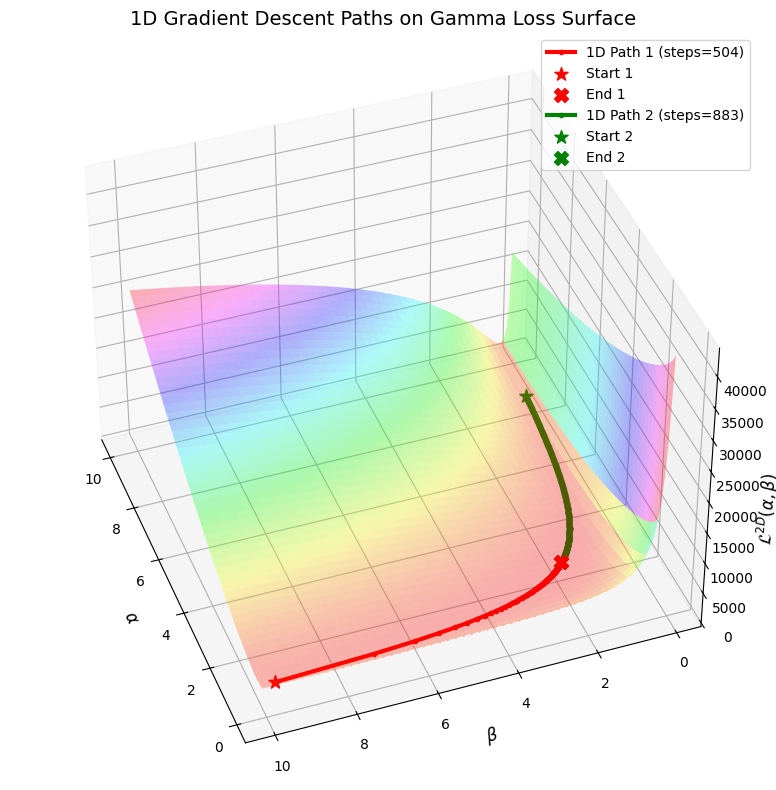

In [117]:
Z = loss_2d(A, B)

# Plot the base 3D surface again
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface
surf = ax.plot_surface(A, B, Z, cmap='hsv', alpha=0.3, edgecolor='none')

# Plot each 1D gradient descent path
colors = ['r', 'g']
for i, (_, steps, path) in enumerate(results_1d):
    alpha_path = path
    beta_path = mean_x / alpha_path
    loss_path = [loss_2d(a, b) for a, b in zip(alpha_path, beta_path)]

    # Plot path
    ax.plot(alpha_path, beta_path, loss_path,
            color=colors[i], linewidth=3, marker='o', markersize=3,
            label=f'1D Path {i+1} (steps={steps})')

    # Start and end points
    ax.scatter(alpha_path[0], beta_path[0], loss_path[0],
               color=colors[i], s=100, marker='*', label=f'Start {i+1}')
    ax.scatter(alpha_path[-1], beta_path[-1], loss_path[-1],
               color=colors[i], s=100, marker='X', label=f'End {i+1}')

# Labels and view
ax.set_xlabel(r'$\alpha$', fontsize=12)
ax.set_ylabel(r'$\beta$', fontsize=12)
ax.set_zlabel(r'$\mathcal{L}^{2D}(\alpha, \beta)$', fontsize=12)
ax.set_title('1D Gradient Descent Paths on Gamma Loss Surface', fontsize=14)
ax.view_init(elev=40, azim=160)

# Legend and layout
ax.legend()
plt.tight_layout()
plt.savefig("Q7_f.png", dpi=300)
plt.show()

## Comparison Between 2D and 1D Minimization

### Results Overview

#### 2D Minimization (from Part c):

| Initialization | Final Estimate | Steps |
|---------------------------------------|----------------------------------------|-------|
| (10.000, 10.000)                      | (2.0618, 1.8708)                        | 2167  |
| (0.400, 9.642)                        | (2.0618, 1.8708)                        | 2561  |
| (7.917, 0.487)                        | (2.0637, 1.8688)                        | 1253  |

#### 1D Minimization (from Part f):

| Initialization | Final Estimate | Steps |
|-----------------------------|------------------------------|-------|
| 0.400                       | 2.0620                       | 504   |
| 7.917                       | 2.0635                       | 883   |

---

### Discussion

#### Convergence Speed

- 1D minimization converges significantly faster than 2D:
  - Fewer than 900 steps for both initial values in 1D
  - Over 1200–2500 steps required in 2D

This is because the 1D formulation eliminates the need to update $beta^*$ at each step, reducing the dimensionality of the optimization problem.

#### Numerical Stability

- Both 1D and 2D converge to nearly identical values of $alpha^*$, showing excellent agreement in accuracy.
- However, 1D avoids the numerical instability that can arise from oscillating between $alpha$ and $beta$ directions during optimization.



Overall, the 1D formulation offers clear computational and conceptual advantages:
- Reduced complexity
- Faster convergence
- Equivalent accuracy

This shows the power of exploiting analytical structure in maximum likelihood estimation problems to simplify numerical optimization.